# LAB 5

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv(r'C:\Users\shrey\Downloads\employment.csv')
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


# 1) Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.


In [6]:
df['datestamp'] = pd.to_datetime(df["datestamp"], format="%Y-%m-%d")
df.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [7]:
df = df.set_index('datestamp')

df

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1


In [8]:
df.isna().any()

Agriculture                       False
Business services                 False
Construction                      False
Durable goods manufacturing       False
Education and Health              False
Finance                           False
Government                        False
Information                       False
Leisure and hospitality           False
Manufacturing                     False
Mining and Extraction             False
Nondurable goods manufacturing    False
Other                             False
Self-employed                     False
Transportation and Utilities      False
Wholesale and Retail Trade        False
dtype: bool

# 2) Generate a boxplot to find the distribution of unemployment rate for every industry

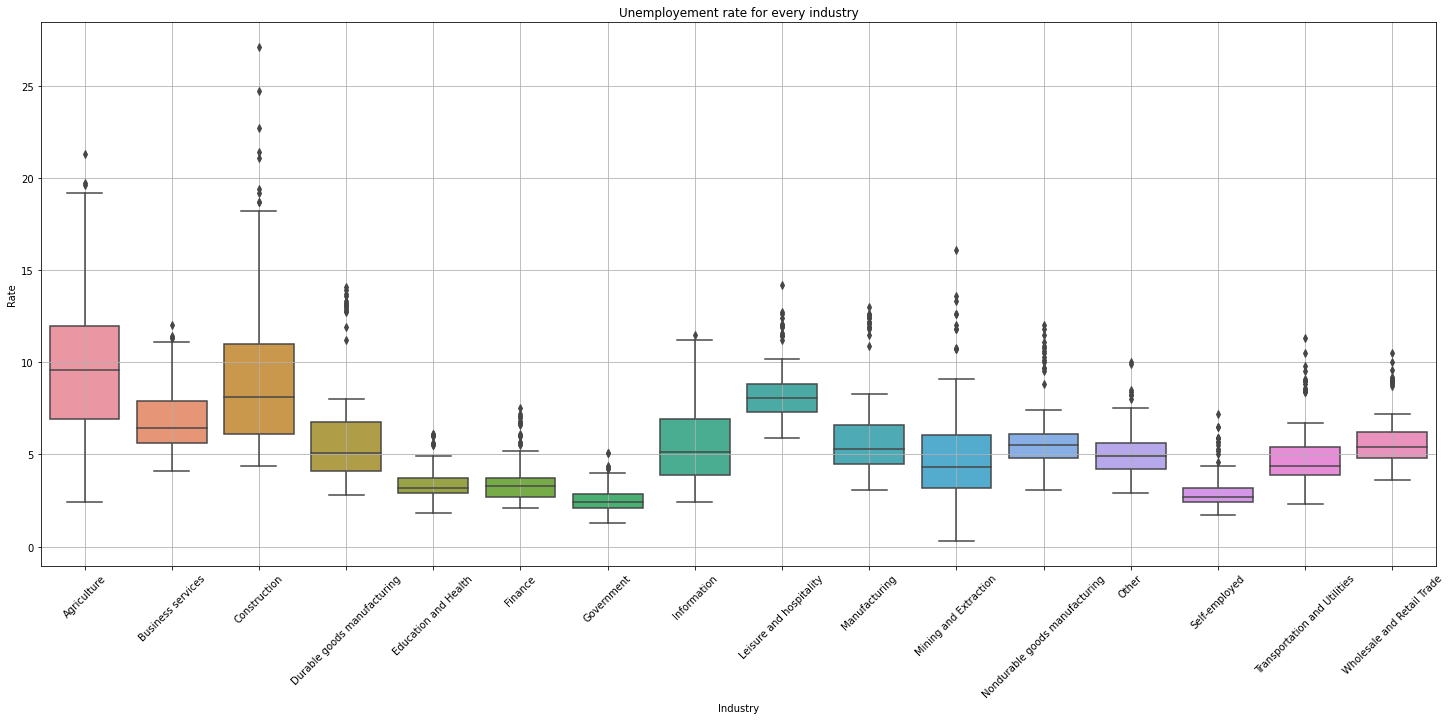

In [13]:
plt.figure(figsize=(25,10))
sns.boxplot(data= df)

plt.xticks(rotation=45)
plt.title('Unemployement rate for every industry')
plt.xlabel('Industry')
plt.ylabel('Rate')
plt.grid(True)
plt.show()


# 3) Using line chart Visualize the unemployment rate of workers by industry.

array([<AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>,
       <AxesSubplot:xlabel='datestamp'>, <AxesSubplot:xlabel='datestamp'>],
      dtype=object)

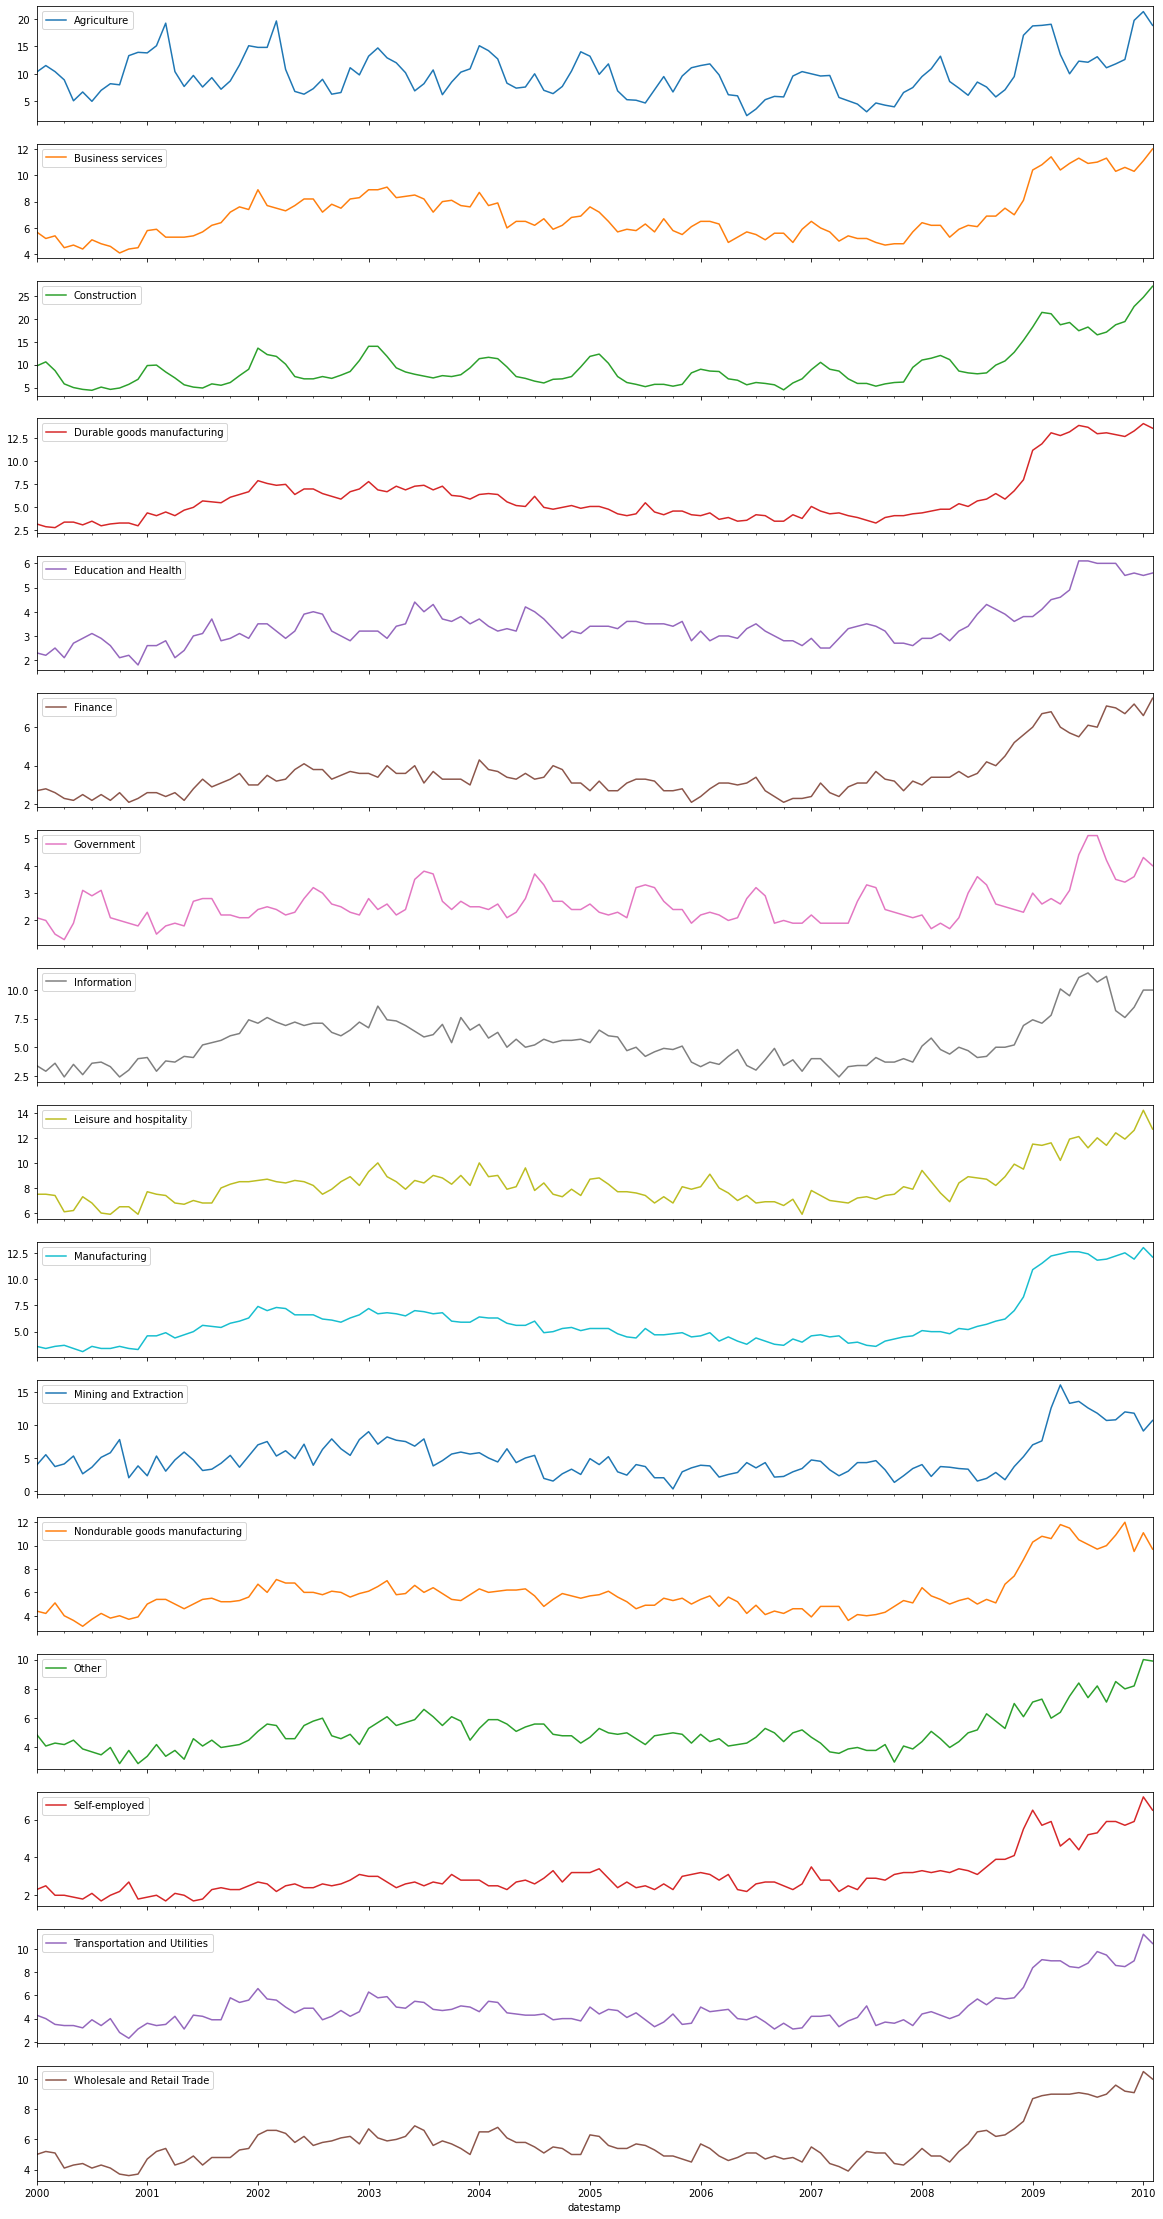

In [14]:
df.plot(subplots=True, figsize=(20,40))

# 4) Plot the monthly and yearly trends .

<AxesSubplot:xlabel='datestamp'>

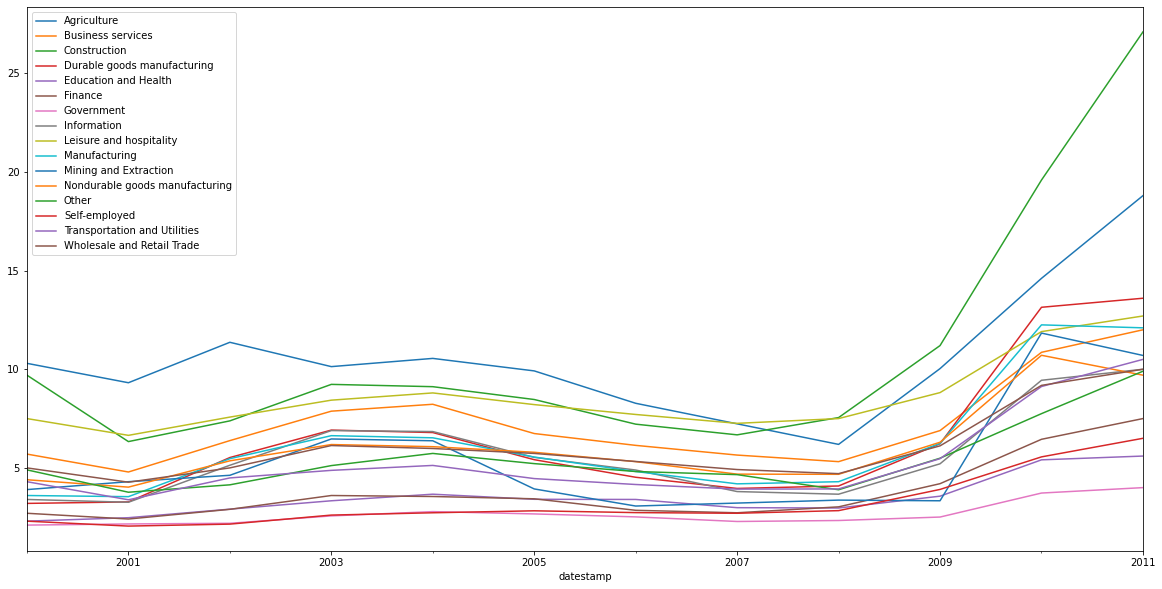

In [15]:
df_semi=df.resample("12M").mean()
df_semi.plot(figsize=(20, 10))

# 5)Apply time series decomposition to your dataset to visualize the trend and seasonality.

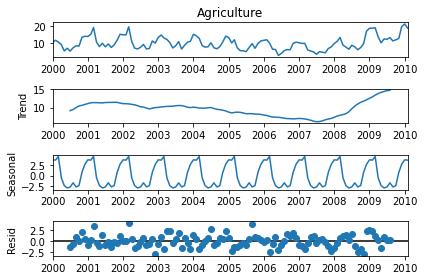

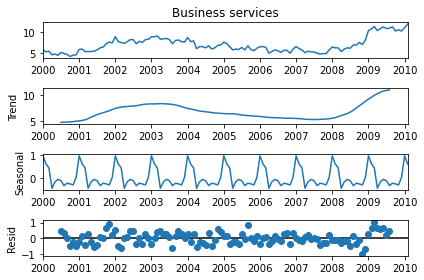

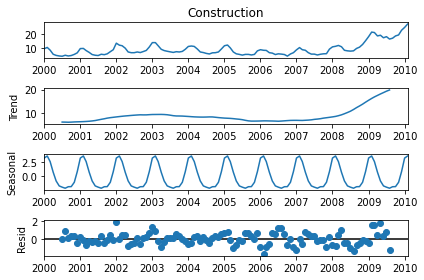

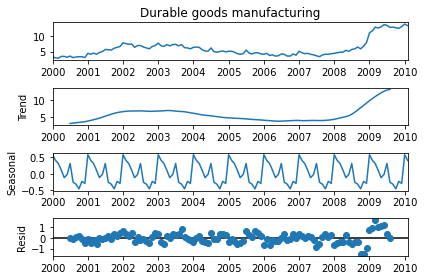

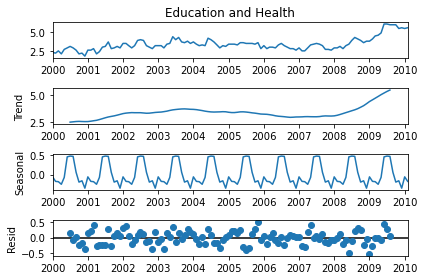

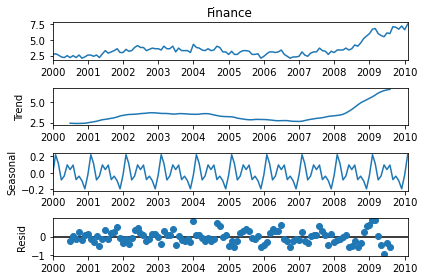

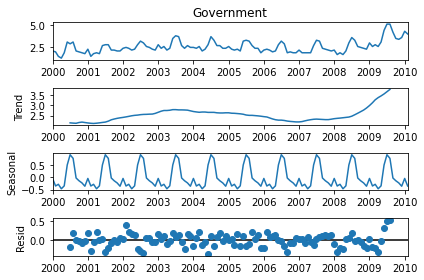

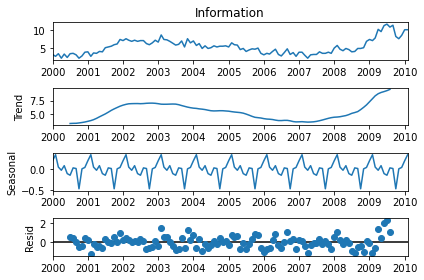

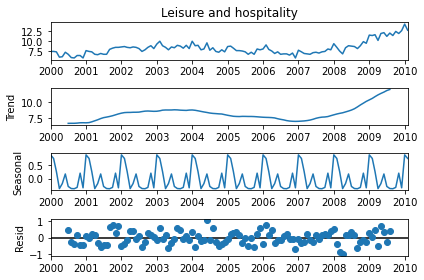

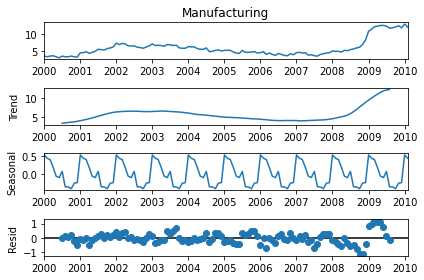

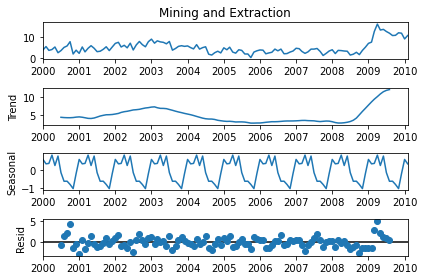

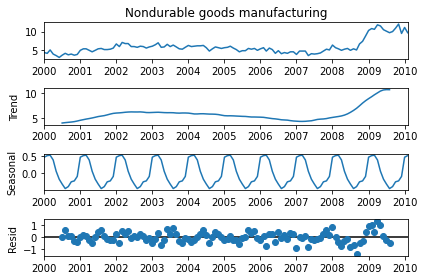

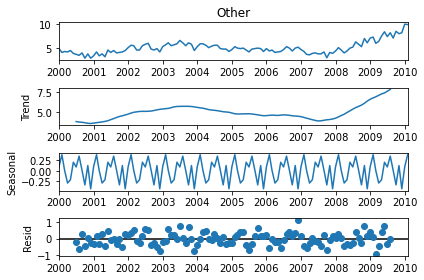

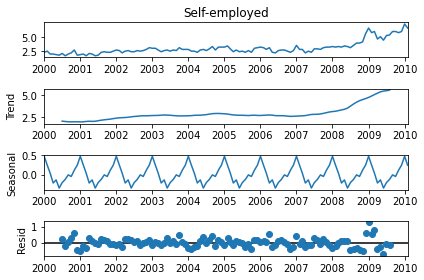

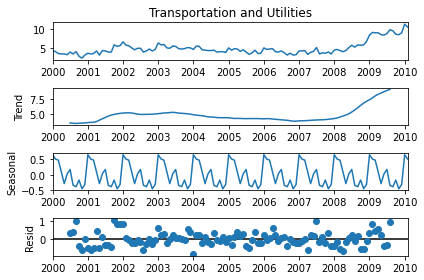

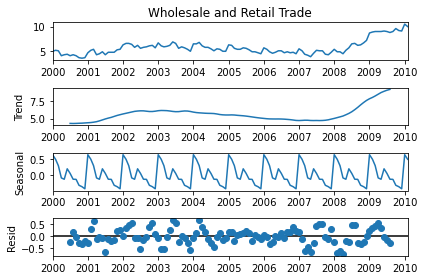

In [20]:
result_yearly = []

for i, col in enumerate(list(df.columns)):
    result_yearly.append(seasonal_decompose(df[col], period = 12))
    result_yearly[i].plot()
    
    #getridofnoise

# 6) Visualize the seasonality of Agriculture, Health and Finance sector

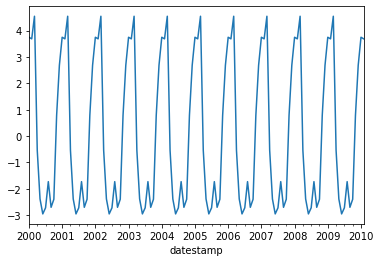

In [21]:
res = seasonal_decompose(df['Agriculture'])
res.seasonal.plot()
plt.show()

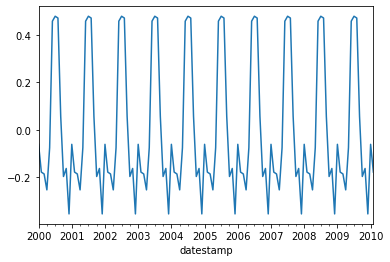

In [22]:
res = seasonal_decompose(df['Education and Health'])
res.seasonal.plot()
plt.show()

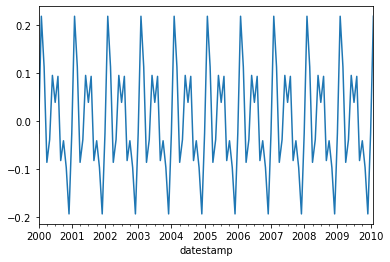

In [23]:
res = seasonal_decompose(df['Finance'])
res.seasonal.plot()
plt.show()

# 7) Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

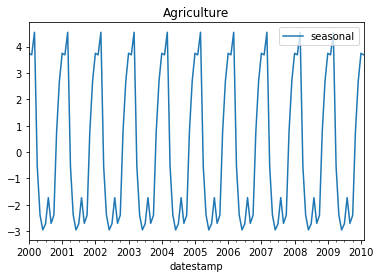

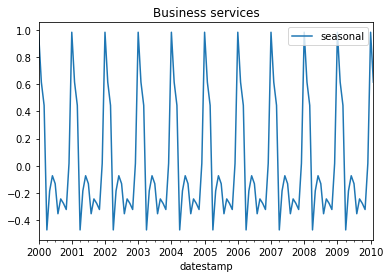

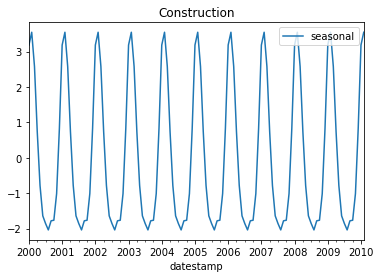

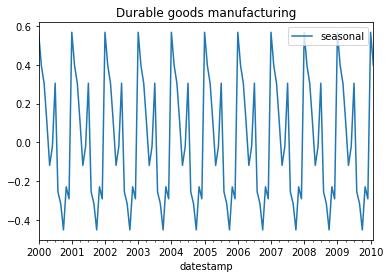

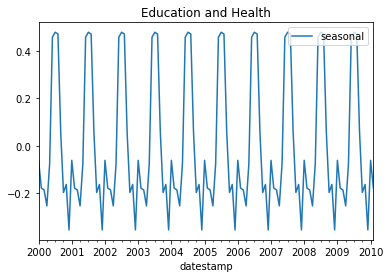

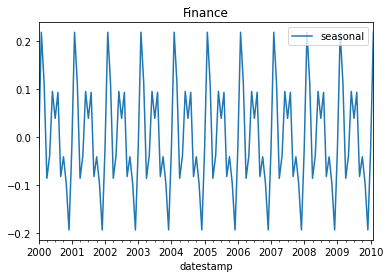

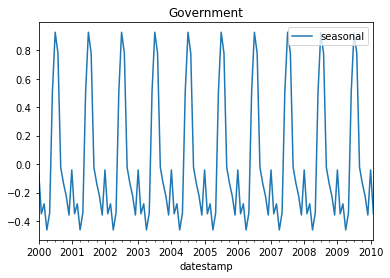

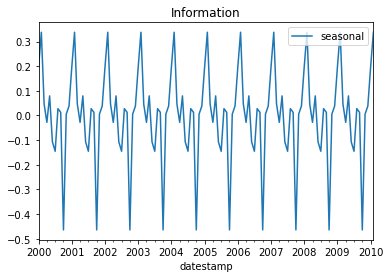

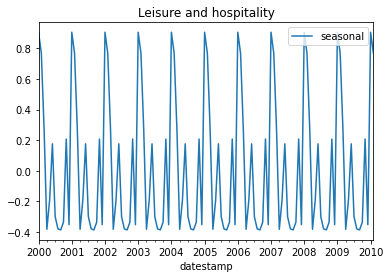

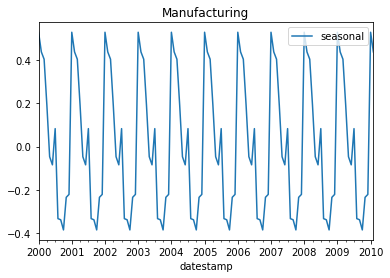

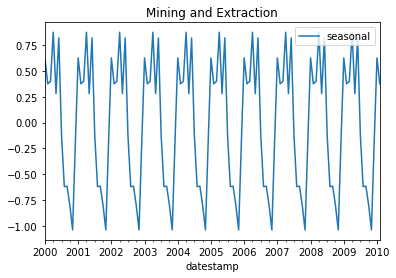

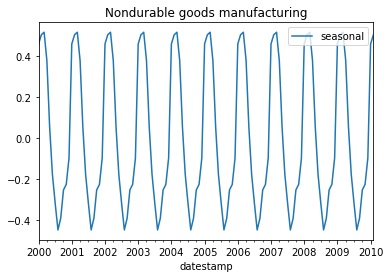

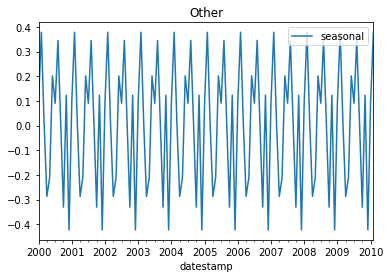

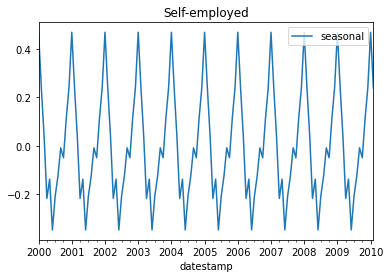

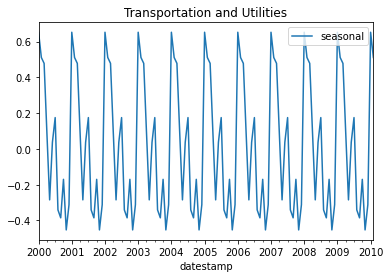

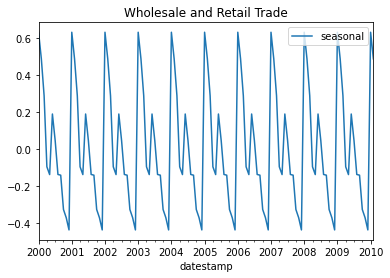

In [27]:
results = []
i = 0
for (columnName, columnData) in df.iteritems():
    f = plt.figure()
    a = f.add_subplot(111)
    res = seasonal_decompose(df[columnName], model='additive')
    a.set_title(df.columns[i])
    res.seasonal.plot()
    plt.legend(loc="upper right")
    results.append(res.seasonal)
    i += 1

In [29]:
results = pd.DataFrame(results)
results

datestamp,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,...,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01
seasonal,3.748816,3.687704,4.546038,-0.540536,-2.388221,-2.956277,-2.724981,-1.731231,-2.705351,-2.399796,...,-2.388221,-2.956277,-2.724981,-1.731231,-2.705351,-2.399796,0.778445,2.685390,3.748816,3.687704
seasonal,0.981096,0.614429,0.443596,-0.471682,-0.184645,-0.073534,-0.131867,-0.352701,-0.243904,-0.276775,...,-0.184645,-0.073534,-0.131867,-0.352701,-0.243904,-0.276775,-0.321682,0.017670,0.981096,0.614429
seasonal,3.184209,3.545320,2.579117,0.735135,-0.781069,-1.640328,-1.856809,-2.038059,-1.780606,-1.764402,...,-0.781069,-1.640328,-1.856809,-2.038059,-1.780606,-1.764402,-1.012087,0.829579,3.184209,3.545320
seasonal,0.567948,0.396651,0.304522,0.103133,-0.118164,-0.020478,0.305309,-0.254691,-0.314923,-0.450571,...,-0.118164,-0.020478,0.305309,-0.254691,-0.314923,-0.450571,-0.228349,-0.290386,0.567948,0.396651
seasonal,-0.060934,-0.178063,-0.185934,-0.253063,-0.075285,0.458511,0.479252,0.471752,0.057585,-0.196582,...,-0.075285,0.458511,0.479252,0.471752,0.057585,-0.196582,-0.162785,-0.354452,-0.060934,-0.178063
seasonal,-0.024861,0.218657,0.113102,-0.085509,-0.038287,0.095509,0.039352,0.093519,-0.081806,-0.040602,...,-0.038287,0.095509,0.039352,0.093519,-0.081806,-0.040602,-0.096157,-0.192917,-0.024861,0.218657
seasonal,-0.040779,-0.349113,-0.279205,-0.462539,-0.343094,0.508295,0.926721,0.779221,-0.022724,-0.134761,...,-0.343094,0.508295,0.926721,0.779221,-0.022724,-0.134761,-0.224113,-0.357909,-0.040779,-0.349113
seasonal,0.195768,0.337897,0.046694,-0.027843,0.079564,-0.107010,-0.145158,0.027758,0.012897,-0.464417,...,0.079564,-0.107010,-0.145158,0.027758,0.012897,-0.464417,0.005490,0.038360,0.195768,0.337897
seasonal,0.905135,0.768098,0.270413,-0.382365,-0.190235,0.175968,-0.300004,-0.379587,-0.386532,-0.336069,...,-0.190235,0.175968,-0.300004,-0.379587,-0.386532,-0.336069,0.207450,-0.352272,0.905135,0.768098
seasonal,0.527751,0.437010,0.403214,0.190714,-0.046786,-0.084286,0.082843,-0.332573,-0.337990,-0.384749,...,-0.046786,-0.084286,0.082843,-0.332573,-0.337990,-0.384749,-0.234286,-0.220860,0.527751,0.437010


In [ ]:
p=sns.pairplot(results)
p